In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Machine_Learning_G6/refs/heads/main/Dataset/Invistico_Airline.csv')

In [3]:
df.iloc[0:1000:200, :]

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
200,satisfied,Loyal Customer,22,Personal Travel,Eco,2676,0,3,0,3,3,0,3,3,2,3,1,3,1,3,12,5.0
400,satisfied,Loyal Customer,41,Personal Travel,Eco,1764,0,4,0,3,4,0,4,4,2,4,4,2,4,4,0,0.0
600,satisfied,Loyal Customer,19,Personal Travel,Eco,2348,0,5,0,2,3,0,3,3,5,4,5,4,5,3,15,17.0
800,satisfied,Loyal Customer,44,Personal Travel,Eco,51,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

In [11]:
numerical = []
categorical = []
drop_columns  = ['Age']
target = 'satisfaction'
for column in df.columns:
    if column == target:
        continue
    elif column in drop_columns:
        continue
    elif df[column].dtype != 'O':
        numerical.append(column)
    else:
        categorical.append(column)

### Preprocessing

In [40]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer

In [17]:
df[categorical].nunique()

Customer Type     2
Type of Travel    2
Class             3
dtype: int64

In [23]:
len(numerical)

17

In [19]:
df[numerical].describe()

,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [35]:
df.groupby(df['satisfaction'])['Seat comfort'].describe()

,count,mean,std,min,25%,50%,75%,max
satisfaction,,,,,,,,
dissatisfied,58793.0,2.467335,0.996059,0.0,2.0,2.0,3.0,5.0
satisfied,71087.0,3.145653,1.586321,0.0,2.0,4.0,4.0,5.0


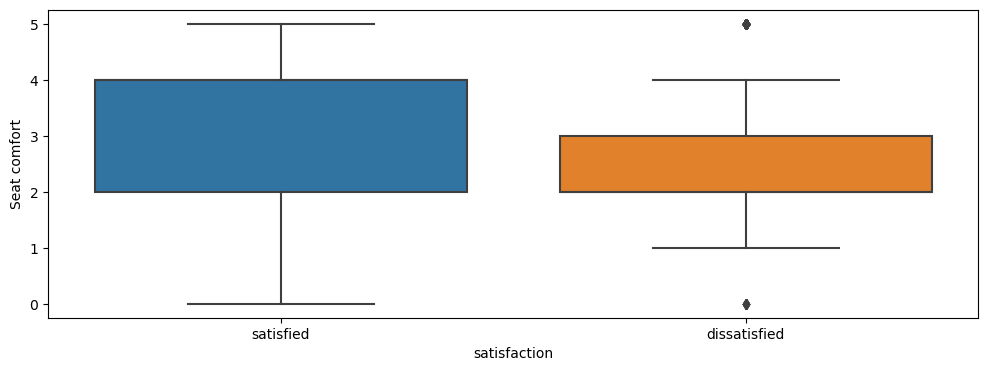

In [33]:
fig, ax = plt.subplots(figsize = (12, 4))
sns.boxplot(y = df['Seat comfort'], x= df['satisfaction']);

<Axes: xlabel='Customer Type', ylabel='count'>

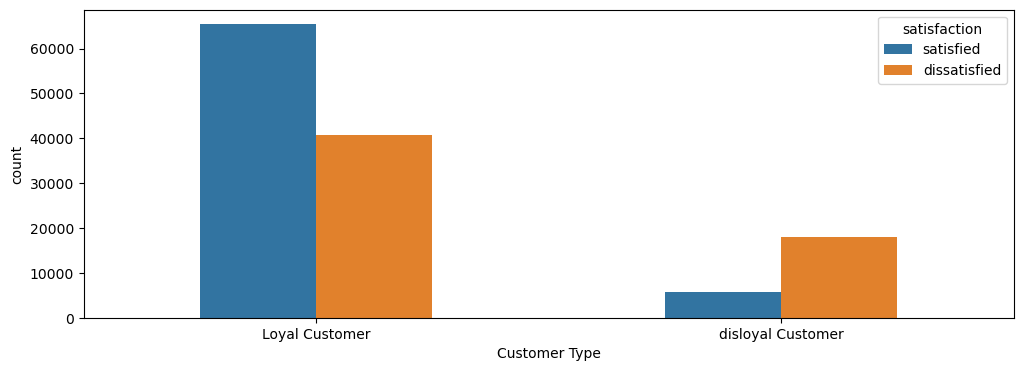

In [29]:
fig, ax = plt.subplots(figsize = (12, 4))
sns.countplot(x = df['Customer Type'], hue = df['satisfaction'], width=0.5) 
## input variable: cate and target cate: countplot

In [119]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

##### Numberical 

In [155]:
numerical_transformer = Pipeline([
    ('imput', SimpleImputer(strategy='median')), ## mean , median: Number, 
    ('scaling', StandardScaler())
])
categorical_transformer = Pipeline([
    ('inmute', SimpleImputer(strategy='most_frequent')), ## Categorical 
     ('encoding', OneHotEncoder())
])

In [157]:
preprocessor = ColumnTransformer([
    ('numerical', numerical_transformer, numerical),
    ('categorical', categorical_transformer, categorical)
])  ### 

In [159]:
training_pipeline_Forest = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestClassifier())
])

In [161]:
training_pipeline_Forest.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('inmute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('model', RandomForestClassifier())])

In [162]:
confusion_matrix(y_test, training_pipeline_Forest.predict(x_test))

array([[14206,   560],
       [  877, 16827]])

In [163]:
print(classification_report(y_test, training_pipeline_Forest.predict(x_test)))

              precision    recall  f1-score   support

dissatisfied       0.94      0.96      0.95     14766
   satisfied       0.97      0.95      0.96     17704

    accuracy                           0.96     32470
   macro avg       0.95      0.96      0.96     32470
weighted avg       0.96      0.96      0.96     32470



In [164]:
training_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', SVC(kernel='linear',degree= 10))
])

In [102]:
x, y = df.drop(columns=target), df[target]
x_train, x_test, y_train, y_test = train_test_split(x, y)
training_pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imput',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Flight Distance',
                                                   'Seat comfort',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Food and drink',
                                                   'Gate location',
                                                   'Inflight wifi service',
                                                   'Inflight entertainment',
                                                   'Online support',
                                                   'Ease of Online booking',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Cleanliness',
                                                   'Online boarding',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in Minutes']),
                                                 ('categorical',
                                                  Pipeline(steps=[('inmute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder())]),
                                                  ['Customer Type',
                                                   'Type of Travel',
                                                   'Class'])])),
                ('model', SVC(degree=10, kernel='linear'))])

In [105]:
y_prediction = training_pipeline.predict(x_test)

In [111]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_prediction)

array([[12235,  2531],
       [ 2802, 14902]])

In [117]:
(12235 + 14902)/(12235 + 14902+ 2802+ 2531)

0.8357560825377272

In [115]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

dissatisfied       0.81      0.83      0.82     14766
   satisfied       0.85      0.84      0.85     17704

    accuracy                           0.84     32470
   macro avg       0.83      0.84      0.83     32470
weighted avg       0.84      0.84      0.84     32470

